### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import os  

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns  
# %matplotlib inline
plt.style.use("ggplot")
plt.rc("font", size=14)



In [3]:
import sklearn
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression      
from sklearn import preprocessing                                           
from sklearn.model_selection import train_test_split, cross_val_score      
from sklearn.impute import SimpleImputer                                   

from sklearn.metrics import confusion_matrix                                
from sklearn.metrics import precision_recall_curve                          
from sklearn.metrics import roc_curve                                       
from sklearn.metrics import auc                                             
from sklearn.metrics import log_loss                                        
from sklearn.metrics import roc_auc_score                                   
from sklearn.metrics import classification_report                         

In [4]:
from sklearn import preprocessing 

### Reading data

In [5]:
dfOrdersItems = pd.read_csv('olist_order_items_dataset.csv')

dfOrders = pd.read_csv('olist_orders_dataset.csv')

dforder_payments = pd.read_csv("olist_order_payments_dataset.csv")

dfProducts = pd.read_csv('olist_products_dataset.csv')

dfOrdersReviews = pd.read_csv('olist_order_reviews_dataset.csv')

dfSellers = pd.read_csv('olist_sellers_dataset.csv')

dfCustomers = pd.read_csv('olist_customers_dataset.csv')

dfGeolocation = pd.read_csv('olist_geolocation_dataset.csv')

dfTranslation = pd.read_csv('product_category_name_translation.csv')


In [6]:
dfTranslation.head(2)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories


In [7]:
dfProducts.head(2)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0


### Product data

In [8]:
dfProducts = dfProducts.merge(dfTranslation, on='product_category_name')

dfProducts.drop('product_category_name', axis=1, inplace=True)

dfProducts.rename(columns={
    'product_category_name_english' : 'product_category'
}, inplace=True)

dfProducts = dfProducts[['product_id','product_category']]
dfProducts.head()

,product_id,product_category
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery
1,6a2fb4dd53d2cdb88e0432f1284a004c,perfumery
2,0d009643171aee696f4733340bc2fdd0,perfumery
3,b1eae565a61935e0011ee7682fef9dc9,perfumery
4,8da90b37f0fb171b4877c124f965b1f6,perfumery


In [9]:
len(dfProducts)

32328

In [10]:
dfGeolocation.head(2)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP


In [11]:
#dfGeolocation = dfGeolocation.drop("geolocation_zip_code_prefix", axis=1)
#dfGeolocation.groupby['geolocation_city'](['geolocation_lat', 'geolocation_lng']).mean().reset_index()

dfGeolocation[['geolocation_city','geolocation_lat','geolocation_lng']].groupby(['geolocation_city']).mean()

,geolocation_lat,geolocation_lng
geolocation_city,,
* cidade,-25.571748,-49.334374
...arraial do cabo,-22.969370,-42.029834
4o. centenario,-24.271860,-53.069433
4º centenario,-24.279801,-53.074723
abadia de goias,-16.767063,-49.438089
...,...,...
áurea,-27.695009,-52.055076
ângulo,-23.195024,-51.917294
érico cardoso,-13.393047,-42.134282


In [12]:
dfSellers.head(2)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP


### Seller data

In [13]:
dfSellerx = pd.merge(dfSellers, dfGeolocation, left_on='seller_zip_code_prefix', right_on='geolocation_zip_code_prefix')
dfSellerx.rename(columns={
    'geolocation_lat' : 'seller_lat',
    'geolocation_lng' : 'sellet_lng',
}, inplace=True)
dfSellerx = dfSellerx[['seller_id','seller_lat','sellet_lng']]
dfSellerx.head()

dfSellerx = dfSellerx[['seller_id','seller_lat','sellet_lng']].groupby(['seller_id']).mean()

In [14]:
dfSellerx.head(1)

,seller_lat,sellet_lng
seller_id,,
0015a82c2db000af6aaaf3ae2ecb0532,-23.640444,-46.541742


In [15]:
dfCustomers.head(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP


In [16]:
dfGeolocation.head(2)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP


### Customer data

In [17]:
dfCustomerx = pd.merge(dfCustomers, dfGeolocation, left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix')
dfCustomerx.rename(columns={
    'geolocation_lat' : 'customer_lat',
    'geolocation_lng' : 'customer_lng',
}, inplace=True)
dfCustomerx = dfCustomerx[['customer_id','customer_lat','customer_lng']]
dfCustomerx.head()
dfCustomerx = dfCustomerx[['customer_id','customer_lat','customer_lng']].groupby(['customer_id']).mean()

In [18]:
dfCustomerx.head()

,customer_lat,customer_lng
customer_id,,
00012a2ce6f8dcda20d059ce98491703,-23.499063,-46.767939
000161a058600d5901f007fab4c27140,-20.469754,-45.123242
0001fd6190edaaf884bcaf3d49edf079,-18.706581,-40.406384
0002414f95344307404f0ace7a26f1d5,-21.770599,-43.355230
000379cdec625522490c315e70c7a9fb,-23.738709,-46.689333


### Merging the data

In [19]:
df_order= pd.merge(dfOrders, dfOrdersItems, on='order_id', how='right')

In [20]:
df_prd= df_order.merge(dfProducts, on='product_id')

In [21]:
df_rev= df_prd.merge(dfOrdersReviews, on='order_id')

In [22]:
df_sel = df_rev.merge(dfSellerx, on='seller_id')

In [23]:
df_sel.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,freight_value,product_category,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,seller_lat,sellet_lng
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,8.72,housewares,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,-23.680729,-46.444238
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1,87285b34884572647811a353c7ac498a,...,7.78,housewares,b46f1e34512b0f4c74a72398b03ca788,4,NaN,Deveriam embalar melhor o produto. A caixa vei...,2017-08-19 00:00:00,2017-08-20 15:16:36,-23.680729,-46.444238


In [24]:
len(df_sel)

111430

In [25]:
len(dfCustomerx)

99163

In [26]:
#df_sel = df_sel[:161442]
#print(len(df_sel))

In [27]:
dfCustomerx = dfCustomerx[:150834]
print(len(dfCustomerx))

99163


In [28]:
df_cus = df_sel.merge(dfCustomerx, on='customer_id')

In [29]:
df = df_cus.rename(columns={'price':'product_price','order_item_id':'quantity'})

In [30]:
df = df.drop(['review_id', 'review_creation_date','review_answer_timestamp','review_comment_title','review_comment_message',], axis=1)
df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'quantity', 'product_id', 'seller_id', 'shipping_limit_date',
       'product_price', 'freight_value', 'product_category', 'review_score',
       'seller_lat', 'sellet_lng', 'customer_lat', 'customer_lng'],
      dtype='object')

In [31]:
len(df)

111130

In [32]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,quantity,product_id,seller_id,shipping_limit_date,product_price,freight_value,product_category,review_score,seller_lat,sellet_lng,customer_lat,customer_lng
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,housewares,4,-23.680729,-46.444238,-23.576983,-46.587161
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,housewares,4,-23.680729,-46.444238,-23.564630,-46.534268
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 18:37:31,29.99,7.78,housewares,5,-23.680729,-46.444238,-23.600462,-46.655318
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-10-27 16:48:46,2017-11-07 18:04:59,2017-11-13 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-31 02:14:11,29.99,14.10,housewares,3,-23.680729,-46.444238,-27.528367,-48.491914
4,8736140c61ea584cb4250074756d8f3b,ab8844663ae049fda8baf15fc928f47f,delivered,2017-08-10 13:35:55,2017-08-10 13:50:09,2017-08-11 13:52:35,2017-08-16 19:03:36,2017-08-23 00:00:00,1,b00a32a0b42fd65efb58a5822009f629,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-16 13:50:09,75.90,7.79,baby,5,-23.680729,-46.444238,-23.486111,-46.366721


In [33]:
df.describe()

,quantity,product_price,freight_value,review_score,seller_lat,sellet_lng,customer_lat,customer_lng
count,111130.000000,111130.000000,111130.000000,111130.000000,111130.000000,111130.000000,111130.000000,111130.000000
mean,1.199118,120.611087,20.006397,4.018375,-22.795907,-47.248280,-21.233961,-46.200481
std,0.709682,183.217109,15.830799,1.397728,2.700105,2.343690,5.568828,4.036446
min,1.000000,0.850000,0.000000,1.000000,-32.079231,-67.813284,-33.689948,-72.668881
25%,1.000000,39.900000,13.080000,4.000000,-23.609430,-48.829744,-23.590637,-48.108023
50%,1.000000,74.900000,16.280000,5.000000,-23.424944,-46.755753,-22.928999,-46.633554
75%,1.000000,134.900000,21.160000,5.000000,-21.757321,-46.522287,-20.179524,-43.635297
max,21.000000,6735.000000,409.680000,5.000000,-2.501242,-34.855616,42.184003,-8.723762


In [34]:
# df.to_csv("data.csv")

### Filtering

In [35]:
df = df[df['order_status'] == 'delivered']
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,quantity,product_id,seller_id,shipping_limit_date,product_price,freight_value,product_category,review_score,seller_lat,sellet_lng,customer_lat,customer_lng
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,housewares,4,-23.680729,-46.444238,-23.576983,-46.587161
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,housewares,4,-23.680729,-46.444238,-23.564630,-46.534268
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 18:37:31,29.99,7.78,housewares,5,-23.680729,-46.444238,-23.600462,-46.655318
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-10-27 16:48:46,2017-11-07 18:04:59,2017-11-13 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-31 02:14:11,29.99,14.10,housewares,3,-23.680729,-46.444238,-27.528367,-48.491914
4,8736140c61ea584cb4250074756d8f3b,ab8844663ae049fda8baf15fc928f47f,delivered,2017-08-10 13:35:55,2017-08-10 13:50:09,2017-08-11 13:52:35,2017-08-16 19:03:36,2017-08-23 00:00:00,1,b00a32a0b42fd65efb58a5822009f629,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-16 13:50:09,75.90,7.79,baby,5,-23.680729,-46.444238,-23.486111,-46.366721


In [36]:
df['product_category'].unique() 

array(['housewares', 'baby', 'cool_stuff', 'sports_leisure', 'toys',
       'furniture_decor', 'perfumery', 'health_beauty', 'pet_shop',
       'music', 'computers', 'construction_tools_construction',
       'signaling_and_security', 'auto', 'watches_gifts', 'audio',
       'electronics', 'computers_accessories', 'telephony',
       'consoles_games', 'stationery', 'bed_bath_table', 'party_supplies',
       'food', 'costruction_tools_tools', 'fashion_bags_accessories',
       'garden_tools', 'office_furniture',
       'industry_commerce_and_business', 'furniture_living_room',
       'market_place', 'home_confort', 'furniture_bedroom', 'art',
       'home_construction', 'air_conditioning',
       'agro_industry_and_commerce', 'costruction_tools_garden',
       'small_appliances', 'fixed_telephony', 'musical_instruments',
       'luggage_accessories', 'fashion_sport', 'home_appliances',
       'small_appliances_home_oven_and_coffee',
       'construction_tools_lights', 'books_technical',


In [37]:
#  # label_encoder object knows how to understand word labels. 
# label_encoder = preprocessing.LabelEncoder() 
  
# # Encode labels in column 'species'. 
# df['product_category']= label_encoder.fit_transform(df['product_category']) 
  
# df['product_category'].unique() 

In [38]:
df.to_csv("data.csv")

In [39]:
df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'quantity', 'product_id', 'seller_id', 'shipping_limit_date',
       'product_price', 'freight_value', 'product_category', 'review_score',
       'seller_lat', 'sellet_lng', 'customer_lat', 'customer_lng'],
      dtype='object')

In [40]:
df['product_id'].unique() 

array(['87285b34884572647811a353c7ac498a',
       'b00a32a0b42fd65efb58a5822009f629',
       '725cbfcaff95a4d43742fdf13cf43c75', ...,
       '1d187e8e7a30417fda31e85679d96f0f',
       '6e1c2008dea1929b9b6c27fa01381e90',
       '9c1e194db1d35a79d962ea610bfe0868'], dtype=object)

In [41]:
df['customer_id'].unique() 

array(['9ef432eb6251297304e76186b10a928d',
       'a20e8105f23924cd00833fd87daa0831',
       '26c7ac168e1433912a51b924fbd34d34', ...,
       'd531d01affc2c55769f6b9ed410d8d3c',
       '9d8c06734fde9823ace11a4b5929b5a7',
       '56772dfbcbe7df908a284ff0d53adf7d'], dtype=object)

In [42]:
df['seller_id'].unique() 

array(['3504c0cb71d7fa48d967e0e4c94d59d9',
       '57c764b4a836300be881e2ff86e449f9',
       '289cdb325fb7e7f891c38608bf9e0962', ...,
       'd263fa444c1504a75cbca5cc465f592a',
       'edf3fabebcc20f7463cc9c53da932ea8',
       'f3862c2188522d89860c38a3ea8b550d'], dtype=object)

In [43]:
print(len(df['seller_id'].unique()))

2905


In [44]:
print(len(df['product_id'].unique()))

31517


In [45]:
print(len(df['product_category'].unique()))

71


In [46]:
print(len(df['customer_id'].unique()))

94657


In [47]:
print(len(df))

108742


### Checking Correlation 

In [48]:
corr = df.corr()

In [49]:
# corr['seller_id']

In [50]:
# corr['product_id']

In [51]:
# corr['product_category']

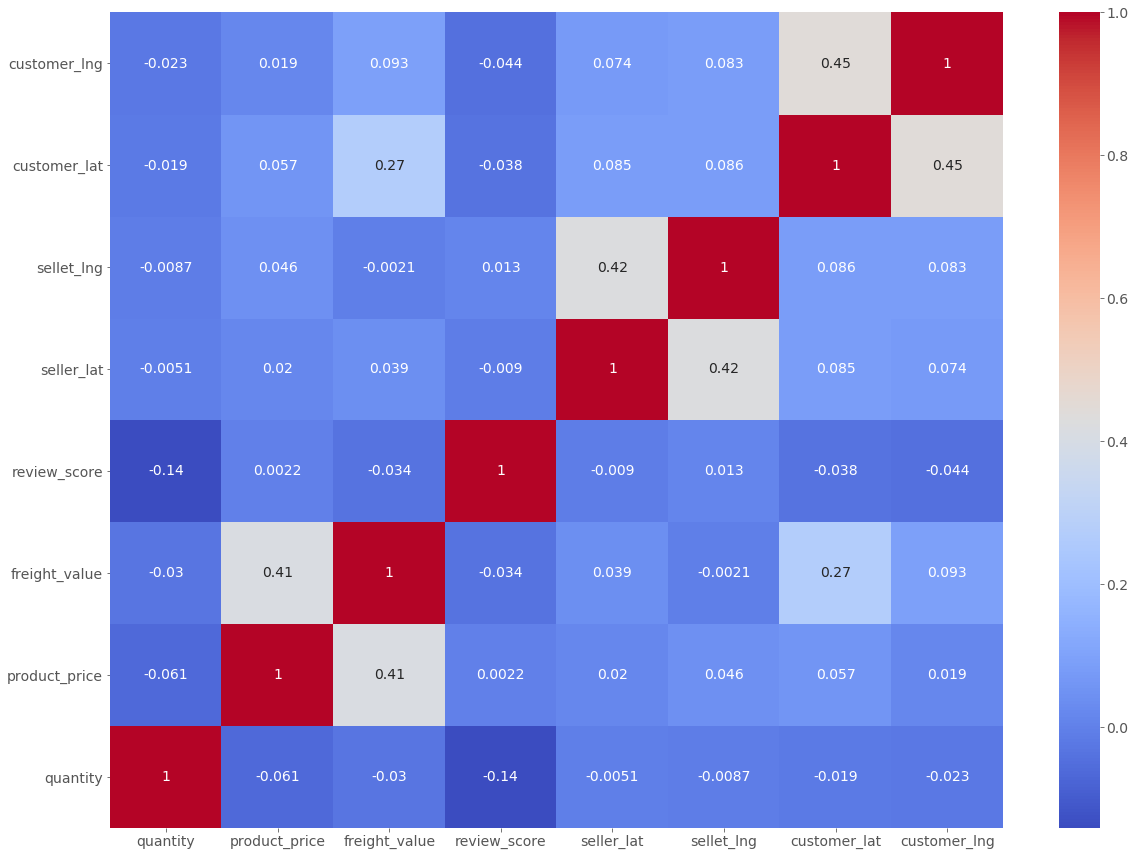

In [52]:
plt.subplots(figsize=(20,15))
ax = sns.heatmap(corr,cmap='coolwarm', annot = True)
plt.yticks(rotation = 0)
ax.invert_yaxis()
plt.show()

## Data Pre-Processing

### Checking null values

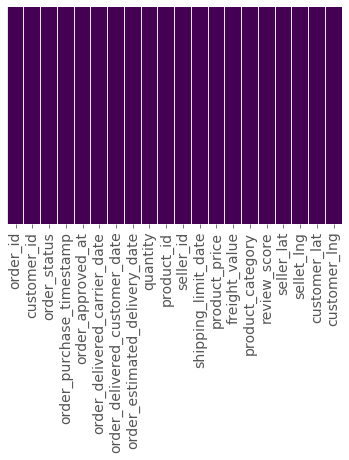

In [53]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108742 entries, 0 to 111129
Data columns (total 20 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       108742 non-null  object 
 1   customer_id                    108742 non-null  object 
 2   order_status                   108742 non-null  object 
 3   order_purchase_timestamp       108742 non-null  object 
 4   order_approved_at              108728 non-null  object 
 5   order_delivered_carrier_date   108740 non-null  object 
 6   order_delivered_customer_date  108734 non-null  object 
 7   order_estimated_delivery_date  108742 non-null  object 
 8   quantity                       108742 non-null  int64  
 9   product_id                     108742 non-null  object 
 10  seller_id                      108742 non-null  object 
 11  shipping_limit_date            108742 non-null  object 
 12  product_price                 

### Dropping some columns

In [55]:
new_df = df.drop(["shipping_limit_date","order_estimated_delivery_date","order_delivered_customer_date","order_delivered_carrier_date","order_approved_at","order_purchase_timestamp"],axis=1)

In [56]:
new_df.head()

,order_id,customer_id,order_status,quantity,product_id,seller_id,product_price,freight_value,product_category,review_score,seller_lat,sellet_lng,customer_lat,customer_lng
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,housewares,4,-23.680729,-46.444238,-23.576983,-46.587161
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,7.78,housewares,4,-23.680729,-46.444238,-23.564630,-46.534268
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,7.78,housewares,5,-23.680729,-46.444238,-23.600462,-46.655318
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,14.10,housewares,3,-23.680729,-46.444238,-27.528367,-48.491914
4,8736140c61ea584cb4250074756d8f3b,ab8844663ae049fda8baf15fc928f47f,delivered,1,b00a32a0b42fd65efb58a5822009f629,3504c0cb71d7fa48d967e0e4c94d59d9,75.90,7.79,baby,5,-23.680729,-46.444238,-23.486111,-46.366721


In [57]:
len(new_df)

108742

### Label encodings for some columns

In [58]:
# new_df['seller_id']= label_encoder.fit_transform(new_df['seller_id']) 
# new_df['seller_id'].unique()

In [59]:
# list(le.inverse_transform([2, 2, 1]))

In [60]:
# new_df['product_id']= label_encoder.fit_transform(new_df['product_id']) 
# new_df['product_id'].unique()

In [61]:
import pickle

In [62]:
new_df.reset_index(inplace=True)
new_df.drop(["index"],axis=1,inplace=True)
print(new_df.head())

                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  128e10d95713541c87cd1a2e48201934  a20e8105f23924cd00833fd87daa0831   
2  0e7e841ddf8f8f2de2bad69267ecfbcf  26c7ac168e1433912a51b924fbd34d34   
3  bfc39df4f36c3693ff3b63fcbea9e90a  53904ddbea91e1e92b2b3f1d09a7af86   
4  8736140c61ea584cb4250074756d8f3b  ab8844663ae049fda8baf15fc928f47f   

  order_status  quantity                        product_id  \
0    delivered         1  87285b34884572647811a353c7ac498a   
1    delivered         1  87285b34884572647811a353c7ac498a   
2    delivered         1  87285b34884572647811a353c7ac498a   
3    delivered         1  87285b34884572647811a353c7ac498a   
4    delivered         1  b00a32a0b42fd65efb58a5822009f629   

                          seller_id  product_price  freight_value  \
0  3504c0cb71d7fa48d967e0e4c94d59d9          29.99           8.72   
1  3504c0cb71d7fa48d967e0e4c94d59d9          29.99

In [63]:
le = preprocessing.LabelEncoder()

In [64]:
le.fit(new_df['seller_id'])

LabelEncoder()

In [65]:
new_df['seller_id']= le.fit_transform(new_df['seller_id'])

In [66]:
seller_list = list(le.inverse_transform(new_df['seller_id']))

In [67]:
print(new_df['seller_id'][0])

599


In [68]:
print(seller_list[0])

3504c0cb71d7fa48d967e0e4c94d59d9


In [69]:
def save_encodings(my_list,column,column_name):
    my_dict = dict()
    for index in range(len(column)):
        encode = column[index]
        value = my_list[index]
        my_dict[encode] = value
        
    return my_dict

In [70]:
seller_dict = save_encodings(seller_list,new_df['seller_id'],'seller_id')

In [71]:
seller_dict[599]

'3504c0cb71d7fa48d967e0e4c94d59d9'

In [72]:
pickle_out=open("seller_dict.pickle","wb")
pickle.dump(seller_dict,pickle_out)
pickle_out.close()

In [73]:
new_df['product_id']= le.fit_transform(new_df['product_id'])

In [74]:
product_list = list(le.inverse_transform(new_df['product_id']))

In [75]:
product_dict = save_encodings(product_list,new_df['product_id'],'product_list')

In [76]:
pickle_out=open("product_dict.pickle","wb")
pickle.dump(product_dict,pickle_out)
pickle_out.close()

In [77]:
print(new_df['product_id'][0])

16672


In [78]:
print(product_list[0])

87285b34884572647811a353c7ac498a


In [79]:
product_dict[16672]

'87285b34884572647811a353c7ac498a'

In [80]:
# product_category
new_df['product_category']= le.fit_transform(new_df['product_category'])

In [81]:
product_category_list = list(le.inverse_transform(new_df['product_category']))

In [82]:
product_category_dict = save_encodings(product_category_list,new_df['product_category'],'product_category')

In [83]:
pickle_out=open("product_category_dict.pickle","wb")
pickle.dump(product_category_dict,pickle_out)
pickle_out.close()

In [84]:
print(new_df['product_category'][0])
print(product_category_list[0])

49
housewares


In [85]:
product_category_dict[49]

'housewares'

In [86]:
print(len(new_df['seller_id'].unique()),len(new_df['product_id'].unique()),len(new_df['product_category']))

2905 31517 108742


In [87]:
# new_df['order_id'].unique() 

In [88]:
#  # label_encoder object knows how to understand word labels. 
# label_encoder = preprocessing.LabelEncoder() 
  
# # Encode labels in column 'species'. 
# new_df['order_id']= label_encoder.fit_transform(new_df['order_id']) 
  
# new_df['order_id'].unique() 

In [89]:
new_df.head(2)

,order_id,customer_id,order_status,quantity,product_id,seller_id,product_price,freight_value,product_category,review_score,seller_lat,sellet_lng,customer_lat,customer_lng
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,1,16672,599,29.99,8.72,49,4,-23.680729,-46.444238,-23.576983,-46.587161
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,1,16672,599,29.99,7.78,49,4,-23.680729,-46.444238,-23.564630,-46.534268


In [90]:
# new_df['product_id'].unique() 

In [91]:
#  # label_encoder object knows how to understand word labels. 
# label_encoder = preprocessing.LabelEncoder() 
  
# # Encode labels in column 'species'. 
# new_df['product_id']= label_encoder.fit_transform(new_df['product_id']) 
  
# new_df['product_id'].unique() 

In [92]:
# new_df.head(2)

In [93]:
# new_df['seller_id'].unique() 

In [94]:
#  # label_encoder object knows how to understand word labels. 
# label_encoder = preprocessing.LabelEncoder() 
  
# # Encode labels in column 'species'. 
# new_df['seller_id']= label_encoder.fit_transform(new_df['seller_id']) 
  
# new_df['seller_id'].unique() 

In [95]:
# new_df['order_status'].unique() 

In [96]:
#  # label_encoder object knows how to understand word labels. 
# label_encoder = preprocessing.LabelEncoder() 
  
# # Encode labels in column 'species'. 
# new_df['order_status']= label_encoder.fit_transform(new_df['order_status']) 
  
# new_df['order_status'].unique() 

In [97]:
new_df.head()

,order_id,customer_id,order_status,quantity,product_id,seller_id,product_price,freight_value,product_category,review_score,seller_lat,sellet_lng,customer_lat,customer_lng
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,1,16672,599,29.99,8.72,49,4,-23.680729,-46.444238,-23.576983,-46.587161
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,1,16672,599,29.99,7.78,49,4,-23.680729,-46.444238,-23.564630,-46.534268
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,1,16672,599,29.99,7.78,49,5,-23.680729,-46.444238,-23.600462,-46.655318
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,1,16672,599,29.99,14.10,49,3,-23.680729,-46.444238,-27.528367,-48.491914
4,8736140c61ea584cb4250074756d8f3b,ab8844663ae049fda8baf15fc928f47f,delivered,1,21628,599,75.90,7.79,6,5,-23.680729,-46.444238,-23.486111,-46.366721


In [98]:
len(new_df)

108742

In [99]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108742 entries, 0 to 108741
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   order_id          108742 non-null  object 
 1   customer_id       108742 non-null  object 
 2   order_status      108742 non-null  object 
 3   quantity          108742 non-null  int64  
 4   product_id        108742 non-null  int32  
 5   seller_id         108742 non-null  int32  
 6   product_price     108742 non-null  float64
 7   freight_value     108742 non-null  float64
 8   product_category  108742 non-null  int32  
 9   review_score      108742 non-null  int64  
 10  seller_lat        108742 non-null  float64
 11  sellet_lng        108742 non-null  float64
 12  customer_lat      108742 non-null  float64
 13  customer_lng      108742 non-null  float64
dtypes: float64(6), int32(3), int64(2), object(3)
memory usage: 10.4+ MB


In [100]:
new_df.describe()

,quantity,product_id,seller_id,product_price,freight_value,product_category,review_score,seller_lat,sellet_lng,customer_lat,customer_lng
count,108742.00000,108742.000000,108742.000000,108742.000000,108742.000000,108742.000000,108742.000000,108742.000000,108742.000000,108742.000000,108742.000000
mean,1.19961,15720.598839,1423.226996,119.940882,19.962407,38.921263,4.067977,-22.796259,-47.252058,-21.246578,-46.214893
std,0.71152,9050.779421,840.878655,181.904394,15.720809,22.525884,1.357693,2.706806,2.344724,5.557515,4.032502
min,1.00000,0.000000,0.000000,0.850000,0.000000,0.000000,1.000000,-32.079231,-63.893565,-33.689948,-72.668881
25%,1.00000,7966.250000,737.000000,39.900000,13.070000,15.000000,4.000000,-23.609488,-48.829744,-23.591954,-48.124107
50%,1.00000,15543.000000,1420.000000,74.900000,16.275000,42.000000,5.000000,-23.424944,-46.755753,-22.929564,-46.634954
75%,1.00000,23588.000000,2218.000000,134.170000,21.150000,60.000000,5.000000,-21.757321,-46.522287,-20.188080,-43.667690
max,21.00000,31516.000000,2904.000000,6735.000000,409.680000,70.000000,5.000000,-2.501242,-34.855616,42.184003,-8.723762


In [101]:
new_df.columns

Index(['order_id', 'customer_id', 'order_status', 'quantity', 'product_id',
       'seller_id', 'product_price', 'freight_value', 'product_category',
       'review_score', 'seller_lat', 'sellet_lng', 'customer_lat',
       'customer_lng'],
      dtype='object')

### Outlier Checking And Handling

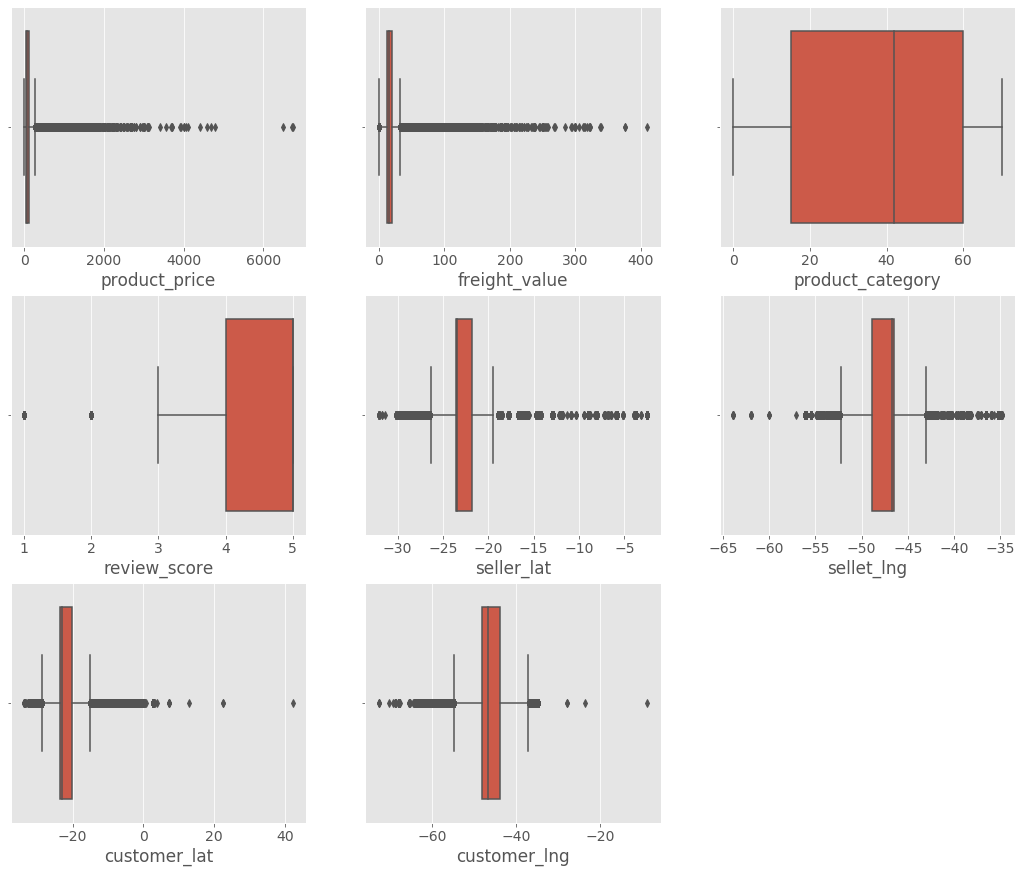

In [102]:
fig = plt.figure(figsize = (18,15))
for i, item in enumerate (new_df.drop(['order_id', 'order_status', 'quantity', 'product_id', 'seller_id','customer_id'],axis=1)):
    plt.subplot(3,3,i+1)
    sns.boxplot(new_df[item])

In [104]:
new_df.columns

Index(['order_id', 'customer_id', 'order_status', 'quantity', 'product_id',
       'seller_id', 'product_price', 'freight_value', 'product_category',
       'review_score', 'seller_lat', 'sellet_lng', 'customer_lat',
       'customer_lng'],
      dtype='object')

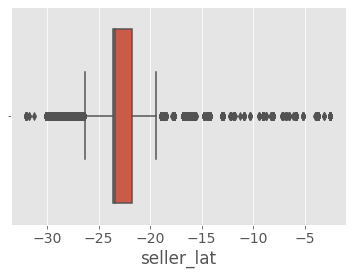

In [105]:
sns.boxplot(new_df['seller_lat'])

In [106]:
Q1 =  new_df['seller_lat'].quantile(0.25)
Q3 = new_df['seller_lat'].quantile(0.75)
IQR = Q3 - Q1

In [107]:
outliers_df =new_df[(new_df['seller_lat'] < Q1-1.5*IQR ) | (new_df['seller_lat'] > Q3+1.5*IQR)]['seller_lat']
print(outliers_df)

509      -28.633921
1034      -6.837169
2200     -18.507265
2279     -18.507265
4669     -30.008182
            ...    
108713   -26.876415
108717   -27.681688
108722   -29.151062
108736   -27.978665
108737   -27.978665
Name: seller_lat, Length: 9729, dtype: float64


In [108]:
for i in range(len(outliers_df)):
    new_df['seller_lat'][outliers_df.index[i]]  = new_df.seller_lat.mean()
print(new_df['seller_lat'][outliers_df.index])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


509      -22.796259
1034     -22.796205
2200     -22.796352
2279     -22.796392
4669     -22.796431
            ...    
108713   -22.887060
108717   -22.887023
108722   -22.886979
108736   -22.886921
108737   -22.886875
Name: seller_lat, Length: 9729, dtype: float64


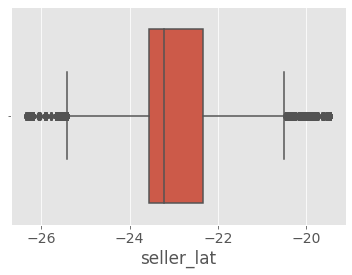

In [109]:
sns.boxplot(new_df['seller_lat'])

In [110]:
a = new_df[(new_df.seller_lat > -22.5) | (new_df.seller_lat<-24)].index
print(a,type(a))

Int64Index([    41,     54,     55,     56,     57,     58,     59,     60,
                61,     62,
            ...
            108712, 108714, 108721, 108728, 108729, 108731, 108732, 108733,
            108738, 108741],
           dtype='int64', length=35674) <class 'pandas.core.indexes.numeric.Int64Index'>


In [111]:
new_df.loc[a,"seller_lat"] = new_df.seller_lat.mean()

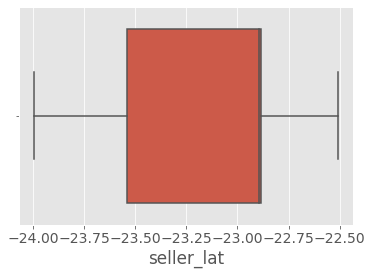

In [112]:
sns.boxplot(new_df['seller_lat'])

In [114]:
new_df.columns

Index(['order_id', 'customer_id', 'order_status', 'quantity', 'product_id',
       'seller_id', 'product_price', 'freight_value', 'product_category',
       'review_score', 'seller_lat', 'sellet_lng', 'customer_lat',
       'customer_lng'],
      dtype='object')

Review Score cleaning

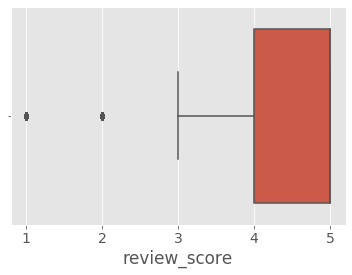

In [115]:
sns.boxplot(new_df['review_score'])

In [116]:
Q1 =  new_df['review_score'].quantile(0.25)
Q3 = new_df['review_score'].quantile(0.75)
IQR = Q3 - Q1

In [117]:
outliers_df =new_df[(new_df['review_score'] < Q1-1.5*IQR ) | (new_df['review_score'] > Q3+1.5*IQR)]['seller_lat']
print(outliers_df)

7        -23.680729
40       -23.680729
41       -22.886828
79       -22.886828
86       -22.886828
            ...    
108708   -23.585607
108709   -23.585607
108713   -22.887060
108721   -22.886828
108729   -22.886828
Name: seller_lat, Length: 16460, dtype: float64


In [118]:
for i in range(len(outliers_df)):
    new_df['review_score'][outliers_df.index[i]]  = new_df.seller_lat.mean()
print(new_df['review_score'][outliers_df.index])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


7        -23
40       -23
41       -23
79       -23
86       -23
          ..
108708   -23
108709   -23
108713   -23
108721   -23
108729   -23
Name: review_score, Length: 16460, dtype: int64


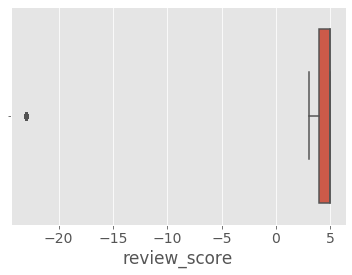

In [119]:
sns.boxplot(new_df['review_score'])

In [120]:
a = new_df[(new_df.review_score<3)].index
print(a,type(a))

Int64Index([     7,     40,     41,     79,     86,     87,    102,    126,
               130,    162,
            ...
            108693, 108695, 108700, 108706, 108707, 108708, 108709, 108713,
            108721, 108729],
           dtype='int64', length=16460) <class 'pandas.core.indexes.numeric.Int64Index'>


In [121]:
new_df.loc[a,"review_score"] = new_df.review_score.mean()

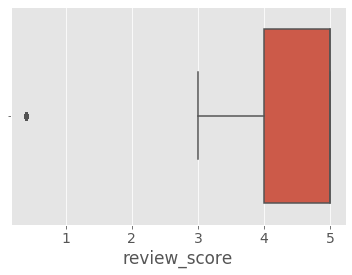

In [122]:
sns.boxplot(new_df['review_score'])

In [124]:
new_df.columns

Index(['order_id', 'customer_id', 'order_status', 'quantity', 'product_id',
       'seller_id', 'product_price', 'freight_value', 'product_category',
       'review_score', 'seller_lat', 'sellet_lng', 'customer_lat',
       'customer_lng'],
      dtype='object')

Sellet_lng

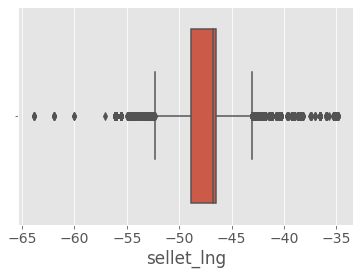

In [125]:
sns.boxplot(new_df['sellet_lng'])

In [126]:
Q1 =  new_df['sellet_lng'].quantile(0.25)
Q3 = new_df['sellet_lng'].quantile(0.75)
IQR = Q3 - Q1

In [127]:
outliers_df =new_df[(new_df['sellet_lng'] < Q1-1.5*IQR ) | (new_df['sellet_lng'] > Q3+1.5*IQR)]['sellet_lng']
print(outliers_df)

81       -43.013995
87       -43.013995
144      -43.013995
185      -43.013995
186      -43.013995
            ...    
108697   -54.251185
108698   -52.341272
108702   -43.034765
108711   -53.466730
108713   -52.403995
Name: sellet_lng, Length: 4740, dtype: float64


In [128]:
for i in range(len(outliers_df)):
    new_df['sellet_lng'][outliers_df.index[i]]  = new_df.sellet_lng.mean()
print(new_df['sellet_lng'][outliers_df.index])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


81       -47.252058
87       -47.252097
144      -47.252136
185      -47.252175
186      -47.252214
            ...    
108697   -47.343096
108698   -47.343033
108702   -47.342987
108711   -47.343026
108713   -47.342970
Name: sellet_lng, Length: 4740, dtype: float64


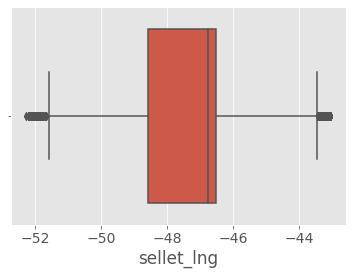

In [129]:
sns.boxplot(new_df['sellet_lng'])

In [130]:
a = new_df[(new_df.sellet_lng > -46) | (new_df.sellet_lng<-47)].index
print(a,type(a))

Int64Index([    41,     54,     55,     56,     57,     58,     59,     60,
                61,     62,
            ...
            108728, 108729, 108731, 108732, 108733, 108736, 108737, 108738,
            108739, 108741],
           dtype='int64', length=62098) <class 'pandas.core.indexes.numeric.Int64Index'>


In [131]:
new_df.loc[a,"sellet_lng"] = new_df.sellet_lng.mean()

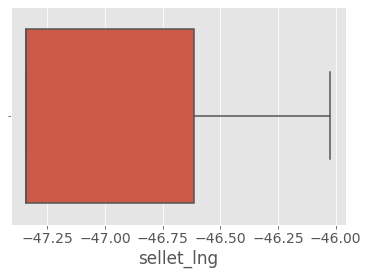

In [132]:
sns.boxplot(new_df['sellet_lng'])

In [133]:
new_df.columns

Index(['order_id', 'customer_id', 'order_status', 'quantity', 'product_id',
       'seller_id', 'product_price', 'freight_value', 'product_category',
       'review_score', 'seller_lat', 'sellet_lng', 'customer_lat',
       'customer_lng'],
      dtype='object')

customer_lat


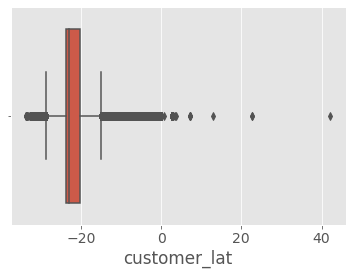

In [134]:
sns.boxplot(new_df['customer_lat'])

In [135]:
Q1 =  new_df['customer_lat'].quantile(0.25)
Q3 = new_df['customer_lat'].quantile(0.75)
IQR = Q3 - Q1

In [136]:
outliers_df =new_df[(new_df['customer_lat'] < Q1-1.5*IQR ) | (new_df['customer_lat'] > Q3+1.5*IQR)]['customer_lat']
print(outliers_df)

21       -29.917005
23       -29.922320
43        -3.800697
51        -3.074262
52       -12.993950
            ...    
108723    -7.137367
108725    -3.795743
108733    -8.058867
108734   -14.855443
108739    -3.741776
Name: customer_lat, Length: 17596, dtype: float64


In [137]:
for i in range(len(outliers_df)):
    new_df['customer_lat'][outliers_df.index[i]]  = new_df.customer_lat.mean()
print(new_df['customer_lat'][outliers_df.index])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


21       -21.246578
23       -21.246499
43       -21.246419
51       -21.246579
52       -21.246746
            ...    
108723   -22.382383
108725   -22.382524
108733   -22.382695
108734   -22.382826
108739   -22.382895
Name: customer_lat, Length: 17596, dtype: float64


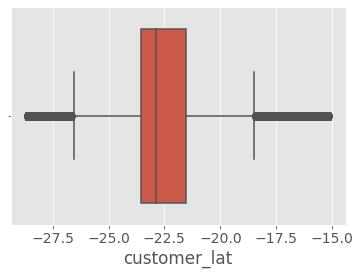

In [138]:
sns.boxplot(new_df['customer_lat'])

In [139]:
a = new_df[(new_df.customer_lat > -21) | (new_df.customer_lat<-25)].index
print(a,type(a))

Int64Index([     3,      6,     14,     20,     29,     31,     36,     44,
                49,     55,
            ...
            108720, 108726, 108727, 108728, 108729, 108731, 108732, 108736,
            108737, 108740],
           dtype='int64', length=27851) <class 'pandas.core.indexes.numeric.Int64Index'>


In [140]:
new_df.loc[a,"customer_lat"] = new_df.customer_lat.mean()

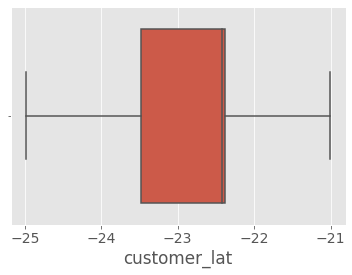

In [141]:
sns.boxplot(new_df['customer_lat'])

customer_lng

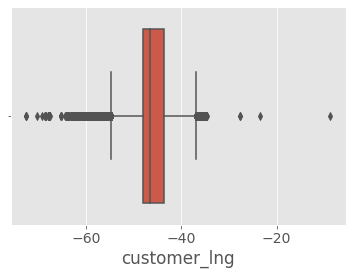

In [142]:
sns.boxplot(new_df['customer_lng'])

In [143]:
Q1 =  new_df['customer_lng'].quantile(0.25)
Q3 = new_df['customer_lng'].quantile(0.75)
IQR = Q3 - Q1

In [144]:
outliers_df =new_df[(new_df['customer_lng'] < Q1-1.5*IQR ) | (new_df['customer_lng'] > Q3+1.5*IQR)]['customer_lng']
print(outliers_df)

51       -60.028003
113      -34.912978
139      -56.083163
140      -56.083163
157      -57.056368
            ...    
108683   -35.203849
108691   -56.121603
108697   -34.855616
108723   -34.909921
108733   -34.900211
Name: customer_lng, Length: 4585, dtype: float64


In [145]:
for i in range(len(outliers_df)):
    new_df['customer_lng'][outliers_df.index[i]]  = new_df.customer_lng.mean()
print(new_df['customer_lng'][outliers_df.index])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


51       -46.214893
113      -46.214766
139      -46.214870
140      -46.214780
157      -46.214689
            ...    
108683   -46.296878
108691   -46.296980
108697   -46.296889
108723   -46.296995
108733   -46.297099
Name: customer_lng, Length: 4585, dtype: float64


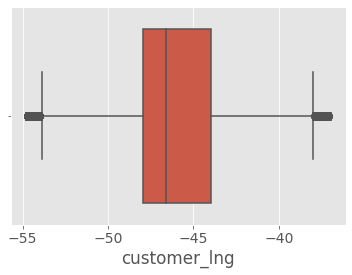

In [146]:
sns.boxplot(new_df['customer_lng'])

In [147]:
a = new_df[(new_df.customer_lng > -46.25) | (new_df.customer_lng<-46.43)].index
print(a,type(a))

Int64Index([     0,      1,      2,      3,      5,      6,      7,      8,
                 9,     10,
            ...
            108730, 108731, 108732, 108734, 108735, 108736, 108737, 108739,
            108740, 108741],
           dtype='int64', length=102636) <class 'pandas.core.indexes.numeric.Int64Index'>


In [148]:
new_df.loc[a,"customer_lng"] = new_df.customer_lng.mean()

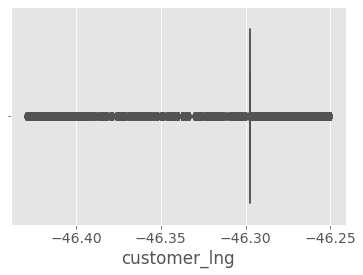

In [149]:
sns.boxplot(new_df['customer_lng'])

In [150]:
new_df.columns

Index(['order_id', 'customer_id', 'order_status', 'quantity', 'product_id',
       'seller_id', 'product_price', 'freight_value', 'product_category',
       'review_score', 'seller_lat', 'sellet_lng', 'customer_lat',
       'customer_lng'],
      dtype='object')

product_price

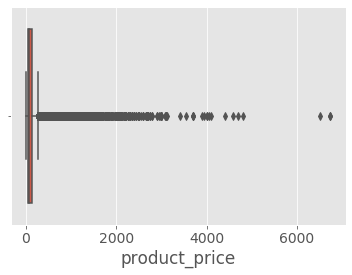

In [151]:
sns.boxplot(new_df['product_price'])

In [152]:
Q1 =  new_df['product_price'].quantile(0.25)
Q3 = new_df['product_price'].quantile(0.75)
IQR = Q3 - Q1

In [153]:
outliers_df =new_df[(new_df['product_price'] < Q1-1.5*IQR ) | (new_df['product_price'] > Q3+1.5*IQR)]['product_price']
print(outliers_df)

404       319.90
1025      344.90
1027      579.00
1028      615.00
1029      579.00
           ...  
108715    789.89
108721    975.00
108723    899.90
108731    289.90
108739    399.00
Name: product_price, Length: 8075, dtype: float64


In [154]:
for i in range(len(outliers_df)):
    new_df['product_price'][outliers_df.index[i]]  = new_df.product_price.mean()
print(new_df['product_price'][outliers_df.index])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


404       119.940882
1025      119.939043
1027      119.936974
1028      119.932753
1029      119.928200
             ...    
108715     85.310263
108721     85.303784
108723     85.295602
108731     85.288111
108739     85.286229
Name: product_price, Length: 8075, dtype: float64


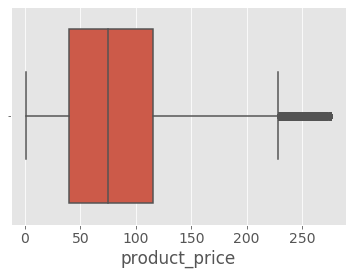

In [155]:
sns.boxplot(new_df['product_price'])

In [156]:
a = new_df[(new_df.product_price>200)].index
print(a,type(a))

Int64Index([   406,    407,    408,    409,    412,    413,    414,    415,
               416,    417,
            ...
            108592, 108601, 108602, 108603, 108613, 108617, 108623, 108639,
            108722, 108740],
           dtype='int64', length=4746) <class 'pandas.core.indexes.numeric.Int64Index'>


In [157]:
new_df.loc[a,"product_price"] = new_df.product_price.mean()

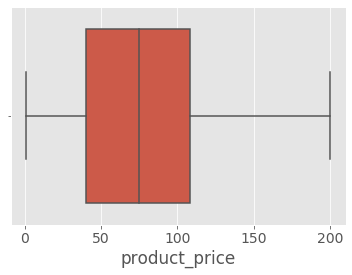

In [158]:
sns.boxplot(new_df['product_price'])

In [159]:
new_df.columns

Index(['order_id', 'customer_id', 'order_status', 'quantity', 'product_id',
       'seller_id', 'product_price', 'freight_value', 'product_category',
       'review_score', 'seller_lat', 'sellet_lng', 'customer_lat',
       'customer_lng'],
      dtype='object')

freight_value

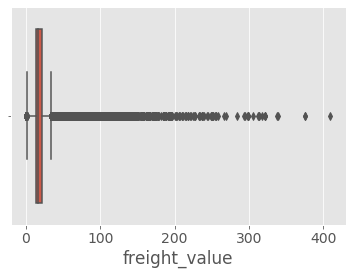

In [160]:
sns.boxplot(new_df['freight_value'])

In [161]:
Q1 =  new_df['freight_value'].quantile(0.25)
Q3 = new_df['freight_value'].quantile(0.75)
IQR = Q3 - Q1

In [162]:
outliers_df =new_df[(new_df['freight_value'] < Q1-1.5*IQR ) | (new_df['freight_value'] > Q3+1.5*IQR)]['freight_value']
print(outliers_df)

40         67.70
119        37.52
202        51.32
303        38.04
304        34.69
           ...  
108715    132.95
108721    108.96
108731     37.35
108733     34.22
108739     45.07
Name: freight_value, Length: 11674, dtype: float64


In [163]:
for i in range(len(outliers_df)):
    new_df['freight_value'][outliers_df.index[i]]  = new_df.freight_value.mean()
print(new_df['freight_value'][outliers_df.index])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


40        19.962407
119       19.961968
202       19.961807
303       19.961518
304       19.961352
            ...    
108715    16.368395
108721    16.367323
108731    16.366472
108733    16.366279
108739    16.366115
Name: freight_value, Length: 11674, dtype: float64


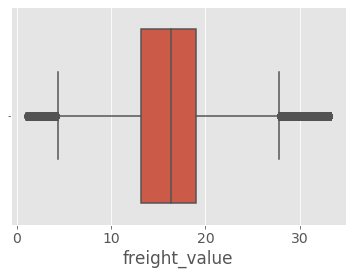

In [164]:
sns.boxplot(new_df['freight_value'])

In [165]:
a = new_df[(new_df.freight_value > 25) | (new_df.freight_value<7)].index
print(a,type(a))

Int64Index([    41,     67,     80,     87,    124,    134,    140,    143,
               144,    157,
            ...
            108582, 108592, 108609, 108614, 108668, 108669, 108684, 108720,
            108723, 108725],
           dtype='int64', length=8526) <class 'pandas.core.indexes.numeric.Int64Index'>


In [166]:
new_df.loc[a,"freight_value"] = new_df.freight_value.mean()

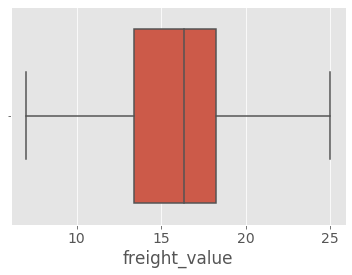

In [167]:
sns.boxplot(new_df['freight_value'])

In [168]:
new_df.columns

Index(['order_id', 'customer_id', 'order_status', 'quantity', 'product_id',
       'seller_id', 'product_price', 'freight_value', 'product_category',
       'review_score', 'seller_lat', 'sellet_lng', 'customer_lat',
       'customer_lng'],
      dtype='object')

In [169]:
new_df.columns

Index(['order_id', 'customer_id', 'order_status', 'quantity', 'product_id',
       'seller_id', 'product_price', 'freight_value', 'product_category',
       'review_score', 'seller_lat', 'sellet_lng', 'customer_lat',
       'customer_lng'],
      dtype='object')

In [170]:
new_df.head()

,order_id,customer_id,order_status,quantity,product_id,seller_id,product_price,freight_value,product_category,review_score,seller_lat,sellet_lng,customer_lat,customer_lng
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,1,16672,599,29.99,8.72,49,4.0,-23.680729,-46.444238,-23.576983,-46.297204
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,1,16672,599,29.99,7.78,49,4.0,-23.680729,-46.444238,-23.564630,-46.297204
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,1,16672,599,29.99,7.78,49,5.0,-23.680729,-46.444238,-23.600462,-46.297204
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,1,16672,599,29.99,14.10,49,3.0,-23.680729,-46.444238,-22.383067,-46.297204
4,8736140c61ea584cb4250074756d8f3b,ab8844663ae049fda8baf15fc928f47f,delivered,1,21628,599,75.90,7.79,6,5.0,-23.680729,-46.444238,-23.486111,-46.366721


In [171]:
new_df.to_csv("update_data.csv")

### Checking Correlation After Data Pre-Processing

In [172]:
new_corr = new_df.corr()

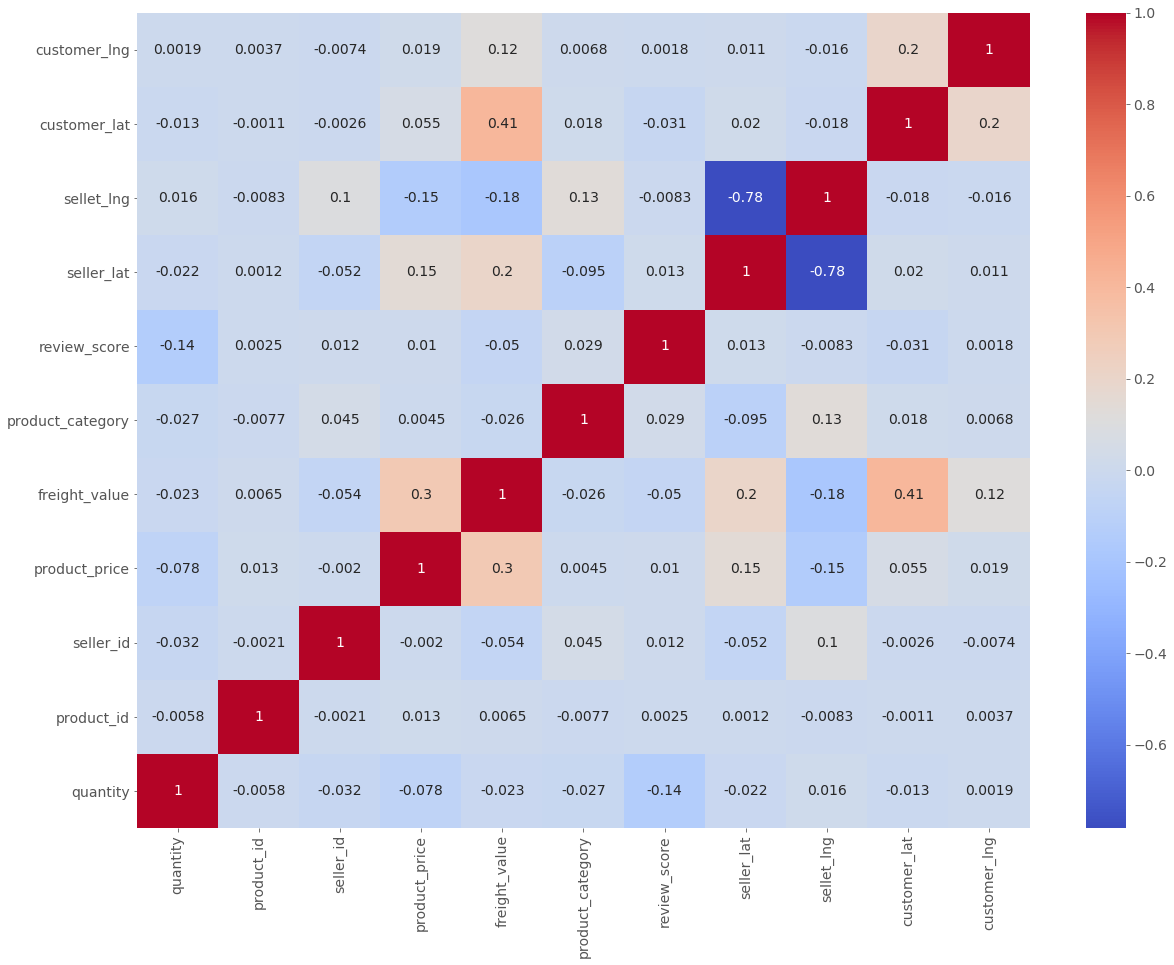

In [173]:
plt.subplots(figsize=(20,15))
ax = sns.heatmap(new_corr,cmap='coolwarm', annot = True)
plt.yticks(rotation = 0)
ax.invert_yaxis()
plt.show()

In [174]:
new_df = new_df.drop(['order_status','quantity','order_id'],axis=1)

In [175]:
new_corr = new_df.corr()

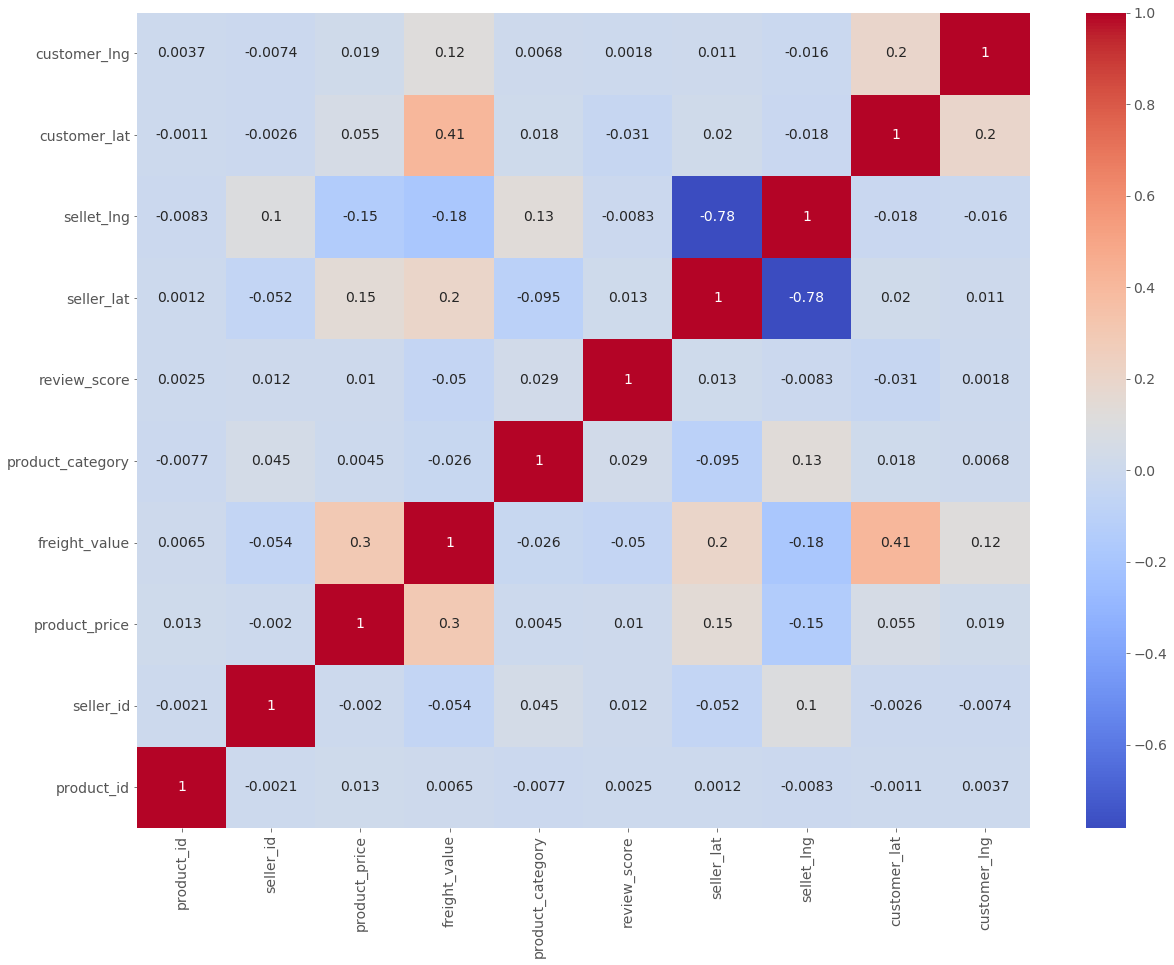

In [176]:
plt.subplots(figsize=(20,15))
ax = sns.heatmap(new_corr,cmap='coolwarm', annot = True)
plt.yticks(rotation = 0)
ax.invert_yaxis()
plt.show()

In [177]:
new_df.to_csv("update_data2.csv")

### Splitting Data After Cleaning

#### Model 1 for Predicting 'review_score'

In [178]:
from sklearn.model_selection import train_test_split

In [179]:
new_df.columns

Index(['customer_id', 'product_id', 'seller_id', 'product_price',
       'freight_value', 'product_category', 'review_score', 'seller_lat',
       'sellet_lng', 'customer_lat', 'customer_lng'],
      dtype='object')

In [190]:
X1 = new_df.drop(['product_id','product_category','seller_id','customer_id'], axis=1)
y1 = new_df['product_category']

In [191]:
xTrain1, xTest1, yTrain1, yTest1 = train_test_split(
    X1,
    y1,
    test_size = .1
)

In [192]:
print(len(X1),len(y1))

108742 108742


In [193]:
print(len(xTrain1),len(yTrain1),len(xTest1),len(yTest1))

97867 97867 10875 10875


In [194]:
xTrain1.columns

Index(['product_price', 'freight_value', 'review_score', 'seller_lat',
       'sellet_lng', 'customer_lat', 'customer_lng'],
      dtype='object')

In [195]:
yTrain1

29957     20
28828      6
77139     53
105284    43
15751     39
          ..
105884    54
15278     64
59417     48
57709     31
104754    39
Name: product_category, Length: 97867, dtype: int32

In [196]:
len(new_df["product_category"].unique())

71

In [197]:
len(xTrain1.columns)

7

In [212]:
xTrain1.shape

(97867, 7)

In [213]:
yTrain1.shape

(97867,)

### ANN Model

In [187]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [188]:
import seaborn as sns

In [223]:
model1=tf.keras.models.Sequential([
tf.keras.layers.Dense(10,input_dim=7,kernel_initializer="normal",activation="relu"),
tf.keras.layers.Dense(10,kernel_initializer="normal",activation="relu"),
tf.keras.layers.Dense(6,kernel_initializer="normal",activation="relu"),
tf.keras.layers.Dense(71, activation='softmax')
])


In [224]:
model1.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 10)                80        
_________________________________________________________________
dense_21 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_22 (Dense)             (None, 6)                 66        
_________________________________________________________________
dense_23 (Dense)             (None, 71)                497       
Total params: 753
Trainable params: 753
Non-trainable params: 0
_________________________________________________________________


In [225]:
model1.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [226]:
model1.fit(xTrain1,yTrain1,epochs=10)

Train on 97867 samples
Epoch 1/5
97867/97867 [==============================] - 12s 127us/sample - loss: 3.2949 - accuracy: 0.0989
Epoch 2/5
97867/97867 [==============================] - 13s 131us/sample - loss: 3.2183 - accuracy: 0.1054
Epoch 3/5
97867/97867 [==============================] - 12s 122us/sample - loss: 3.2014 - accuracy: 0.1103
Epoch 4/5
97867/97867 [==============================] - 14s 140us/sample - loss: 3.1988 - accuracy: 0.1116
Epoch 5/5
97867/97867 [==============================] - 14s 142us/sample - loss: 3.1978 - accuracy: 0.1122


In [227]:
print("Generate predictions for 3 samples")
predictions1 = model1.predict(xTest1[:3])
print("predictions shape:", predictions1.shape)

Generate predictions for 3 samples
predictions shape: (3, 71)


In [228]:
print(predictions1)

[[2.19874596e-03 3.55671486e-03 2.25363113e-03 2.16476343e-04
  3.20261531e-03 3.70573997e-02 2.98218280e-02 1.04697049e-01
  3.50018102e-03 6.48635207e-04 2.03486905e-03 1.22137266e-04
  6.92791946e-04 6.55223615e-04 2.66955304e-03 7.52480477e-02
  7.16831861e-03 1.08640511e-02 3.02822958e-03 2.13304558e-03
  3.96460779e-02 1.60509208e-03 8.51426506e-04 2.20470974e-04
  2.15938687e-03 1.26100262e-04 5.54957381e-03 2.90626456e-04
  1.50787113e-02 7.70747647e-05 1.24565745e-03 2.82966718e-03
  3.66218621e-04 1.43878569e-03 2.03325553e-03 1.01192214e-04
  2.52979295e-03 1.20463385e-03 9.83464066e-04 7.33998492e-02
  6.34773867e-03 4.91225393e-04 3.65169793e-02 8.74715075e-02
  6.06884528e-03 2.87386891e-03 2.59164717e-05 4.46697790e-03
  5.50917070e-03 4.96658422e-02 3.05464771e-03 3.21764592e-03
  1.82858974e-04 1.34995608e-02 2.68200971e-03 3.72664072e-04
  7.07767718e-03 2.00782362e-02 3.84911400e-04 3.33302692e-02
  2.02320609e-02 2.46514010e-05 1.37196691e-03 6.71030534e-03
  8.2170

In [229]:
print(yTest1[:3])

50149    69
97980    49
28475    68
Name: product_category, dtype: int32


In [230]:
labels = np.argmax(predictions1, axis=-1)    
print(labels)

[ 7  7 68]


In [241]:
# initialize N  
N = 5
test_list=predictions1[0]
# Indices of N largest elements in list 
# using sorted() + lambda + list slicing 
res = sorted(range(len(test_list)), key = lambda sub: test_list[sub])[-N:] 

print(res)

[39, 15, 43, 65, 7]


In [240]:
print(np.sum(predictions1[0]))
print(predictions1[0])

0.99999994
[2.19874596e-03 3.55671486e-03 2.25363113e-03 2.16476343e-04
 3.20261531e-03 3.70573997e-02 2.98218280e-02 1.04697049e-01
 3.50018102e-03 6.48635207e-04 2.03486905e-03 1.22137266e-04
 6.92791946e-04 6.55223615e-04 2.66955304e-03 7.52480477e-02
 7.16831861e-03 1.08640511e-02 3.02822958e-03 2.13304558e-03
 3.96460779e-02 1.60509208e-03 8.51426506e-04 2.20470974e-04
 2.15938687e-03 1.26100262e-04 5.54957381e-03 2.90626456e-04
 1.50787113e-02 7.70747647e-05 1.24565745e-03 2.82966718e-03
 3.66218621e-04 1.43878569e-03 2.03325553e-03 1.01192214e-04
 2.52979295e-03 1.20463385e-03 9.83464066e-04 7.33998492e-02
 6.34773867e-03 4.91225393e-04 3.65169793e-02 8.74715075e-02
 6.06884528e-03 2.87386891e-03 2.59164717e-05 4.46697790e-03
 5.50917070e-03 4.96658422e-02 3.05464771e-03 3.21764592e-03
 1.82858974e-04 1.34995608e-02 2.68200971e-03 3.72664072e-04
 7.07767718e-03 2.00782362e-02 3.84911400e-04 3.33302692e-02
 2.02320609e-02 2.46514010e-05 1.37196691e-03 6.71030534e-03
 8.21708294e-

In [ ]:
model1.save("product_category_model.h5")